<a href="https://colab.research.google.com/github/brunobonatini/Data_Science/blob/main/Projeto_Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="bruno logo" width="15%" src="https://raw.githubusercontent.com/brunobonatini/Data_Science/main/logo.png">

#### **Data Scientist & Analyst**
*by [Bruno Bonatini](https://www.linkedin.com/in/bsbonatini/)*

---

# Análise dos Dados do Airbnb - *Los Angeles - Califórnia*

O [Airbnb]('https://www.airbnb.com.br/') é considerado a maior empresa de hotelaria da atualidade. O detalhe é que a empresa não possui nenhum hotel próprio.

Fazendo a conexão com pessoas que querem viajar (e se hospedar) com proprietários que querem alugar seu imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora e prática, tornando assim uma alternativa de hospedagem para todos.

No final de 2018, a Startup fundada há 10 anos atrás, já havia hospedado **mais de 300 milhões de pessoas** ao redor do mundo, desafiando redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb muito legal, é disponibilizar os dados do site de algumas das principais cidades do mundo. Pelo meio do [Portal Airbnb](http://insideairbnb.com/get-the-data/) é possível baixar uma grande quantidade de dados para desenvolver projetos de Data Science.


**Neste notebook analisaremos dados da cidade de Los Angeles e veremos quais insights podemos extrair dos dados brutos.**

## Obtenção dos Dados

Todos os dados que utilizei neste projeto foram obtidos a partir do site [Portal Airbnb](http://insideairbnb.com/get-the-data/).

Para esta análise exploratória inicial, será baixado o seguinte arquivo:

*   ***listing.csv - Summary information and metrics for insights in Los Angeles  (good for visualisations).***

Importante: Como o Portal com os dados está em constante evolução, pode ser que este arquivo não esteja mais disponível quando estiver visualisando este projeto.

Portanto deixo disponível [aqui](https://drive.google.com/file/d/1VxqnkLge6vHjy3BLm1W04p9iW4iwzL4H/view?usp=share_link) o link do arquivo oficial deste projeto para download.


In [64]:
# importar os pacotes necessarios

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [65]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('https://raw.githubusercontent.com/brunobonatini/Data_Science/main/datasets/listings_losangeles.csv')

## Análise dos Dados

Esta primeira etapa do projeto tem como objetivo obter um entendimento de como os dados estão estruturados no dataset.

**Dicionário das variáveis**

* `id` - número de identificação da propriedade
* `name` - nome da propriedade
* `host_id` -  código de hospedagem
* `host_name` - nome do proprietário
* `neighbourhood_group` - grupo de bairros
* `neighbourhood` - nome do bairro
* `latitude` - posição geográfica no mapa de latitude
* `longitude` - posição geográfica no mapa de longitude
* `room_type` - tipo de quarto a ser alugado
* `price` - valor do aluguel
* `minimum_nights` - número mínimo de noites
* `number_of_reviews` - número de visualizações
* `last_review` - data da última visualização
* `reviews_per_month` - visualizacões por mês
* `calculated_host_listings_count` - número de propriedades por anfitrião
* `availability_365` - avaliação anual
* `number_of_reviews_ltm` - número de visualizações por ítem
* `license` - licença da propriedade

Antes de iniciar qualquer análise, vamos verificar um breve resumo com poucas linhas do nosso *dataset*, para compreendê - lo melhor.

In [66]:
# visualizando as 5 primeiras entradas

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.01,1,227,0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,118,30,38,2022-11-29,0.37,2,239,5,NaN
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.17,2,365,3,NaN
3,65467,A Luxury Home in Los Angeles,61864,Olivier,Other Cities,Culver City,34.02438,-118.38374,Private room,300,60,0,NaN,NaN,2,365,0,NaN
4,206662,"Hollywood & Hiking, 30 day minimum",33861,Kevin,City of Los Angeles,Hollywood Hills West,34.10420,-118.34748,Private room,46,30,95,2022-08-11,0.71,1,84,4,NaN


### **Q1.Qual o total de entradas e número de colunas? Qual o tipo de dados de cada variável?**

Após olharmos as primeiras entradas do dataset, agora precisamos saber a quantidade total destas entradas, o número de colunas (variáveis) e o tipo de dados de cada variável. 


In [67]:
# identificando o volume do DataFrame e os tipos de dados das variáveis.

print('\nEntradas: {}'.format(df.shape[0]))
print('Colunas: {}\n'.format(df.shape[1]))

df.info()


Entradas: 40438
Colunas: 18

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40438 entries, 0 to 40437
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              40438 non-null  int64  
 1   name                            40436 non-null  object 
 2   host_id                         40438 non-null  int64  
 3   host_name                       40436 non-null  object 
 4   neighbourhood_group             40438 non-null  object 
 5   neighbourhood                   40438 non-null  object 
 6   latitude                        40438 non-null  float64
 7   longitude                       40438 non-null  float64
 8   room_type                       40438 non-null  object 
 9   price                           40438 non-null  int64  
 10  minimum_nights                  40438 non-null  int64  
 11  number_of_reviews               40438 non-null  int64  
 12  la

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um `dataset` está diretamente ligada a quantidade de seus valores ausentes. É muito importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. 

In [68]:
# ordenando em ordem decrescente as variáveis por seus valores ausentes

(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)


license                           0.746229
reviews_per_month                 0.261759
last_review                       0.261759
host_name                         0.000049
name                              0.000049
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

###Podemos identificar as seguintes situações nos valores ausentes.
* Aproximadamente 75% dos dados da variável `license` são nulos.
* 26% dos dados das variáveis `last_review` e `reviews_per_month` são nulos.
* Os dados nulos das variáveis `name` e `host_name` são iguais.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, plotarei um histograma.

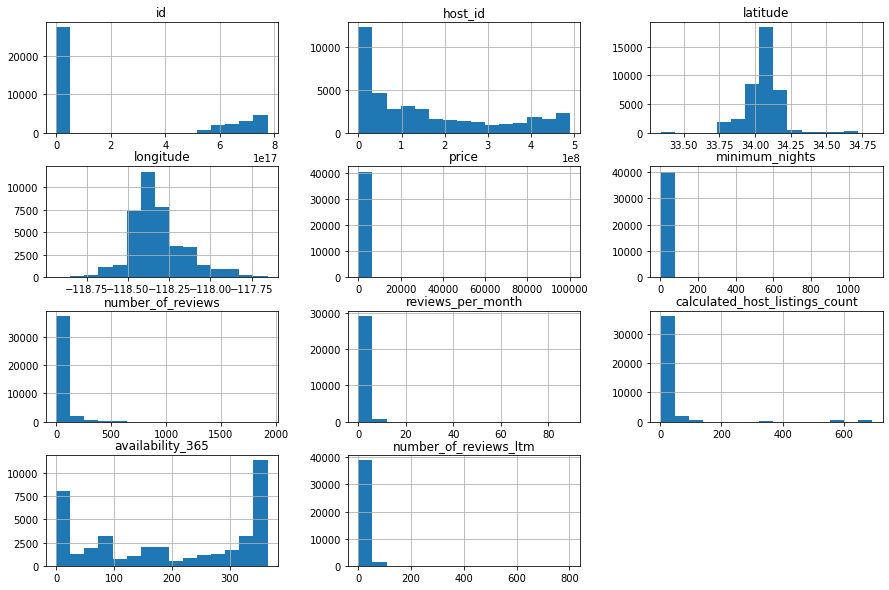

In [69]:
df.hist(bins=15, figsize=(15, 10));


## Analisando Outliers

Observando as variáveis `price`, `minimum_nights`, `number_of_reviews`, `calculated_host_listings_count` e `number_of_reviews_ltm` no histograma pode se notar que não seguem uma distribuição e distorcem a representação gráfica, isso quer dizer que temos presença de `outliers`.

Para confirmar se existem estes outiliers veremos um resumo estatístico das variáveis e plotaremos os `boxplots` para cada variável.

In [70]:
# verificando o resumo estatístico das variáveis numéricas

df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,40438.000000,40438.000000,40438.000000,29853.000000,40438.000000,40438.000000,40438.000000
mean,279.449602,18.700653,33.562021,1.499085,32.550126,198.164969,8.930115
std,1136.463147,30.973639,72.691163,1.866809,114.678176,142.646899,18.804460
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,85.000000,2.000000,0.000000,0.240000,1.000000,62.000000,0.000000
50%,138.000000,30.000000,5.000000,0.800000,2.000000,190.000000,1.000000
75%,235.000000,30.000000,31.000000,2.250000,10.000000,348.000000,8.000000
max,99999.000000,1124.000000,1924.000000,89.000000,693.000000,365.000000,801.000000


Observando o resumo estatístico podemos dizer que:

* O preço da propriedade (price) tem 75% dos valores menores que 235.00 e o seu valor máximo é de 99999.00 por noite.
* A quantidade mínima de noites (minimum_nigths) está acima de 365 dias no ano.
* O número de visualizações (number_of_reiews) tem 75% dos valores abaixo de 31 e seu valor máximo é de 1924.
* A quantidade de propriedades por anfitrião (calculated_host_listings_count) 75% é menor do que 10 e seu valor máximo é 693 propriedades por anftrião.

###Boxplot para `price` - Identificando outliers

price - valores acima de 1500:
839 entradas.
2.0748%.


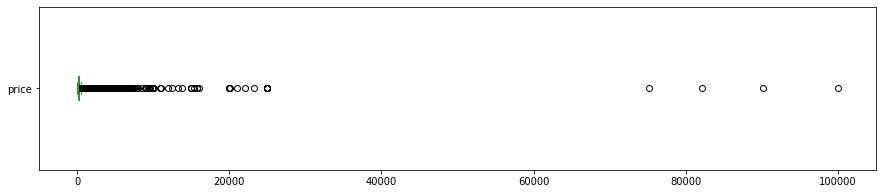

In [71]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))

# verificando quantidade de valores acima de 1500

print('price - valores acima de 1500:')
print('{} entradas.'.format(len(df[df.price > 1500])))
print('{:.4f}%.'.format((len(df[df.price > 1500]) / df.shape[0])*100))

###Boxplot para `minimum_nigths` - Identificando outliers

minimum_nights - valores acima de 30:
5144 entradas.
12.7207%.


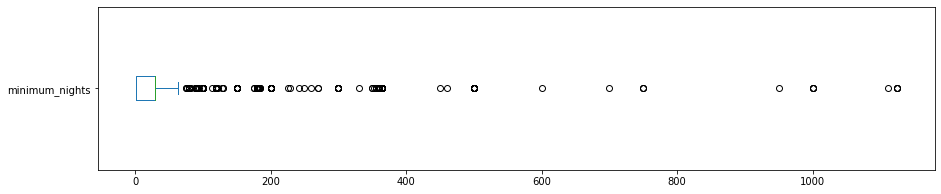

In [72]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))

# verificando quantidade de valores acima de 30

print('minimum_nights - valores acima de 30:')
print('{} entradas.'.format(len(df[df.minimum_nights > 30])))
print('{:.4f}%.'.format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

###Boxplot para `number_of_reviews` - identificando outliers



number_of_reviews - acima de 600:
57 entradas.
0.1410%.


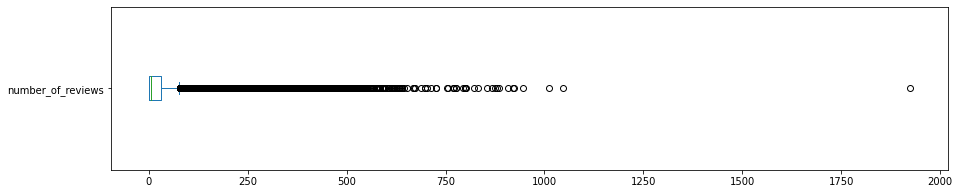

In [73]:
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3))

# verificando quantidade de valores acima de 600
print('number_of_reviews - acima de 600:')
print('{} entradas.'.format(len(df[df.number_of_reviews > 600])))
print('{:.4f}%.'.format((len(df[df.number_of_reviews > 600]) / df.shape[0])*100))

###Boxplot para `calculated_host_listings_count` - Identificando outliers

calculated_host_listings_count - acima de 100:
2313 entradas.
5.7199%


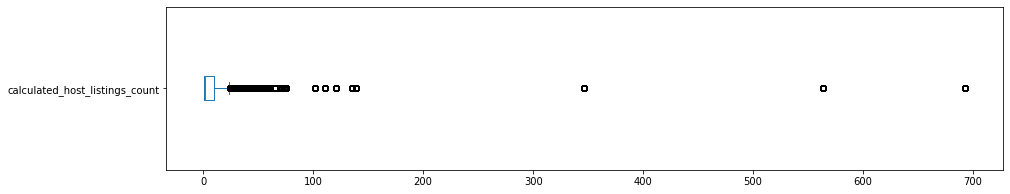

In [74]:
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3))

# verificando quantidade de valores acima de 100
print('calculated_host_listings_count - acima de 100:')
print('{} entradas.'.format(len(df[df.calculated_host_listings_count > 100])))
print('{:.4f}%'.format((len(df[df.calculated_host_listings_count > 100]) / df.shape[0])*100))

###Histograma sem outliers

Conforme analisamos os `outliers` nas variáveis `price`, `minimum_nights`, `number_of_reviews` e `calculated_host_listings_count`, agora vamos limpar o DataFrame delas e plotar um histograma novamente.

In [75]:
# criando uma cópia do DataFrame em um novo DataFrame df_clean
df_clean = df.copy()

In [76]:
# removendo os outliers em df_clean

df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.number_of_reviews > 600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 100].index, axis=0, inplace=True)

In [77]:
# removendo as colunas que não utilizarei na análise

df_clean.drop('id', axis=1, inplace=True)
df_clean.drop('host_id', axis=1, inplace=True)
df_clean.drop('license', axis=1, inplace=True)

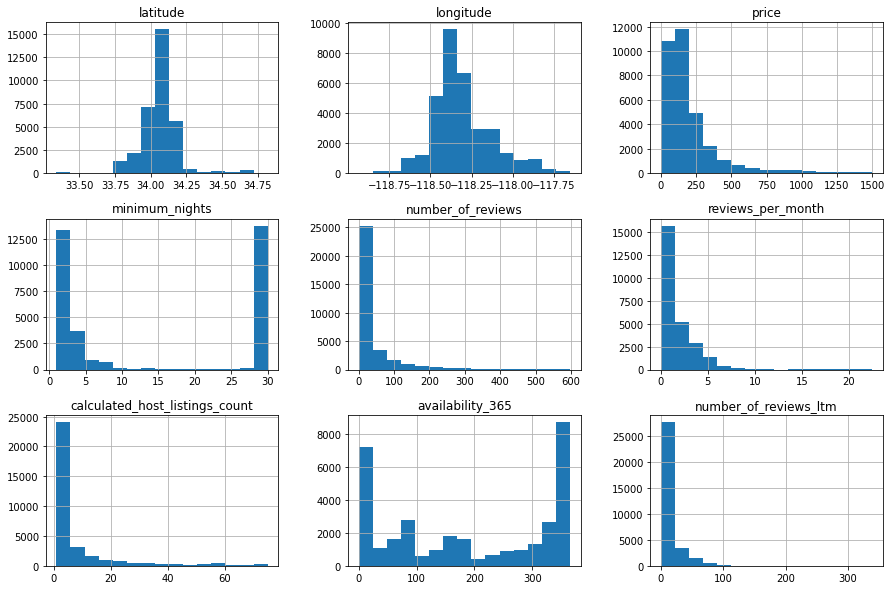

In [78]:
# plotando o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15, 10));

##Tratando valores ausentes

In [79]:
# visualizando a quantidade de valores ausentes no DataFrame df_clean

df_clean.isnull().sum()

name                                 2
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7674
reviews_per_month                 7674
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

In [80]:
# preenchendo valores ausente em 'reviews_per_month' com a mediada

rpm_median = df_clean.reviews_per_month.median()
df_clean = df_clean.fillna({'reviews_per_month': rpm_median})

### **Q4. Qual a média dos preços de aluguel?**

In [81]:
# ver a média da coluna `price``

print('Média: {:.2f}'.format(df_clean['price'].mean()))


Média: 206.41


### **Q5. Qual a correlação existente entre as variáveis?**

Correlação significa que existe relação entre duas 'coisas'. Em nosso caso estamos buscando relações entre as variáveis.

Esta relação pode ser medida, e é a função do coeficiente de correlação estabelecer qual a intensidade dela.

Para identificar as correlações existentes entre as variáveis de interesse irei:
* Criar uma matriz de correlação;
* Gerar um heatmap a partir desta matriz, utilizando a biblioteca `seaborn`.

In [82]:
# criando a uma matriz de correlação

corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].corr()

# mostrando a matriz de correlação

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
price,1.000000,-0.076224,-0.068203,-0.032318,0.040430,0.091071,-0.039067
minimum_nights,-0.076224,1.000000,-0.178409,-0.416736,-0.055389,-0.051279,-0.400452
number_of_reviews,-0.068203,-0.178409,1.000000,0.563110,-0.118245,-0.012326,0.645282
reviews_per_month,-0.032318,-0.416736,0.563110,1.000000,-0.044579,0.068359,0.800523
calculated_host_listings_count,0.040430,-0.055389,-0.118245,-0.044579,1.000000,0.232953,-0.070946
availability_365,0.091071,-0.051279,-0.012326,0.068359,0.232953,1.000000,0.029846
number_of_reviews_ltm,-0.039067,-0.400452,0.645282,0.800523,-0.070946,0.029846,1.000000


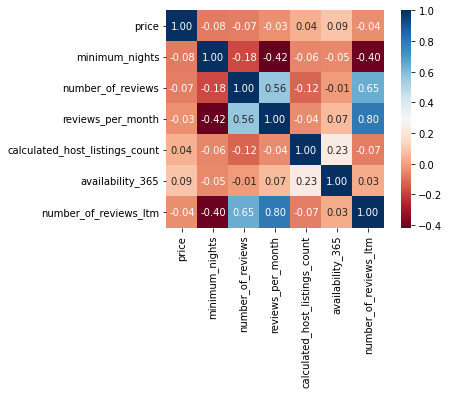

In [83]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna `room_type` indica o tipo de locação que está disponibilizado no Airbnb.

Para que utiliza frequentemente o site, sabe que temos opções de apartamentos ou casas inteiras, aluguel de um quarto ou até mesmo dividir um quarto com outros hóspedes.

Vamos contar e verificar a quantitade de ocorrências de cada tipo de aluguel.

In [84]:
# mostrando a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()


Entire home/apt    23204
Private room        9293
Shared room          704
Hotel room            78
Name: room_type, dtype: int64

In [85]:
# mostrando a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.697257
Private room       0.279245
Shared room        0.021154
Hotel room         0.002344
Name: room_type, dtype: float64

Analisando os dados acima, podemos dizer que o imóvel mais alugado é **home/apt (casa/apto)**.

### **Q7. Qual a localidade mais cara do dataset?**



In [86]:
# verificando preços por bairros, na média

df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Malibu                                   657.856115
Bel-Air                                  526.589744
Hollywood Hills West                     518.264198
Beverly Crest                            491.252427
Unincorporated Santa Monica Mountains    478.278146
Westlake Village                         449.888889
Palos Verdes Estates                     443.823529
Hidden Hills                             414.000000
Pacific Palisades                        401.133803
Rancho Palos Verdes                      378.551282
Name: price, dtype: float64

In [87]:
# verificando a quantidade de imóveis no bairro Bel-Air

print(df_clean[df_clean.neighbourhood == 'Bel-Air'].shape)

(39, 15)


Acima conseguimos perceber que bairros como `Malibu` e `Bel-Air` estão com valores médios acima de bairros como `Beverly Hills`, `Hollywood` e `Koreatown`.

Para quem não conhece Los Angeles apresentaria estes dados sem se questionar quanto a estes valores.

Este é só um exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para `Bel-Air`.




### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [88]:
# mostrando a média da coluna `minimum_nights``

df_clean['minimum_nights'].mean()

14.085729739475346

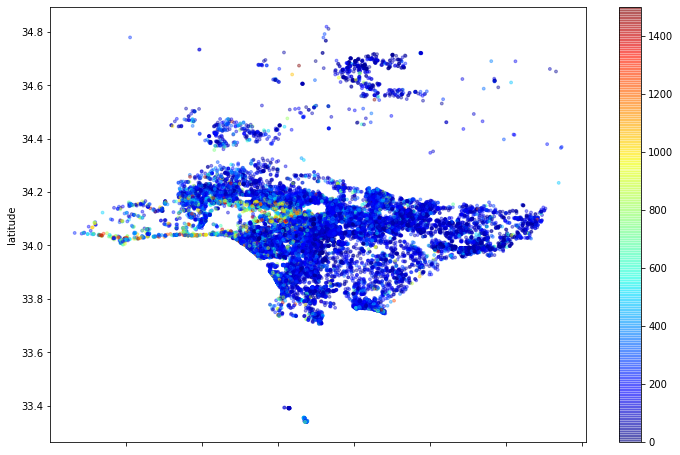

In [89]:
# plotando os imóveis pela latitude-longitude

df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12, 8));



## Conclusões


Foi feita apenas uma análise superfical na base de dados do Airbnb, porém pude notar a grande quantidade de outliers em algumas variáveis.

Ficou claro também como os outliers alteram o valor médio das variáveis e seu desvio padrão.

Notamos que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Lembrando que este `dataset` é uma versão resumida, porém bastante grande, ideal para uma análise inicial. Para uma próxima análise exploratória, o recomendado é utilizar a versão completa do `dataset`.